In [8]:
import pandas as pd
from python_files.data_preprocessor import preprocess, preprocess_test

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

In [ ]:
train = pd.read_csv('data\\train_data.csv')
test = pd.read_csv('data\\test_data.csv')


In [6]:
train

,Transaction_Id,Date_Time,Phone_Number,CNIC,Name,Type,Amount,ID_Source,Old_Balance,New_Balance,...,IMEI,KYC_Status,Service_Charges,Channel,Remarks,ID_Dest,Dest_State,Dest_City,Account_Creation_Date,Is_Fraud
0,3453454144,2021-03-12 13:53:31,+92 308-9850450,75282-1417620-1,Fatima Shah,CASH_OUT,93817.22,C705338432,0.00,0.00,...,411359451450113,Under Process,187.63444,Debit Card,Payment for services,C36988934,Islamabad Capital Territory,Islamabad,2019-10-23 00:42:39,0
1,7954266395,2020-06-18 13:57:14,+92 337-4835418,45997-4236778-9,Raheel Javed,PAYMENT,7071.80,C1569107795,93736.42,86664.61,...,547740843869062,Registered,14.14360,Mobile Payments,NaN,M1167980727,Gilgit-Baltistan,Ghanche,2020-06-18 13:56:14,0
2,2510181162,2022-03-18 20:40:51,+92 315-0943824,88526-7495499-7,Nashit Rizvi,PAYMENT,20337.13,C653955847,215967.00,195629.87,...,482767587586207,Validated,40.67426,Mobile Payments,NaN,M1592230365,Islamabad Capital Territory,Islamabad,2018-12-05 08:16:26,0
3,6730099345,2025-02-20 11:29:26,+92 350-3208436,77181-5813083-2,Ali Jamil,CASH_IN,239604.43,C224537658,138728.00,378332.43,...,328076138187622,On-Hold,479.20886,Credit Card,Restaurant bill,C38250664,Azad Kashmir,Mirpur,2021-07-16 09:39:27,0
4,817276160,2022-05-01 08:11:36,+92 320-9665324,76516-8587872-6,Bilal Mirza,PAYMENT,28638.54,C961742537,0.00,0.00,...,860111840741131,On-Hold,57.27708,Debit Card,NaN,M2080236476,Islamabad Capital Territory,Islamabad,2022-05-01 08:05:36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,9262794008,2020-09-05 15:39:34,+92 344-7715877,15288-4100323-7,Ahmed Rana,TRANSFER,594678.59,C744641204,21120.00,0.00,...,555748875170107,On-Hold,1189.35718,Bank Transfer,Food purchase,C1337720486,Gilgit-Baltistan,Hunza,2019-01-26 04:27:11,0
4653830,8204935400,2025-12-22 08:45:27,+92 323-1335622,95186-5939967-7,Zain Butt,CASH_IN,138746.64,C380683170,29901.00,168647.64,...,243181833710182,Validated,277.49328,E-Wallet,Utility bill payment,C1973105330,Khyber Pakhtunkhwa,Peshawar,2025-11-07 22:26:00,0
4653831,62976909,2024-08-27 14:14:01,+92 326-1928750,15800-2261018-5,Sana Siddiqui,PAYMENT,4326.36,C1555491717,0.00,0.00,...,483741530146691,Under Process,8.65272,Mobile Payments,Online shopping,M1863019853,Balochistan,Sibi,2021-12-19 04:20:59,0
4653832,2903274151,2019-11-08 02:31:25,+92 347-0053615,44056-3546418-6,Fatima Hashmi,CASH_IN,658522.10,C278009228,1655724.70,2314246.81,...,404748347253215,On-Hold,1317.04420,E-Wallet,NaN,C1257838201,Gilgit-Baltistan,Astore,2019-11-08 02:23:25,0


In [7]:
test['Is_Fraud'].value_counts()

Is_Fraud
0    1906298
1       2488
Name: count, dtype: int64

In [8]:
x_train = train.drop(['Is_Fraud'],axis = 1)
y_train = train['Is_Fraud']


x_test = test.drop(['Is_Fraud'],axis = 1)
y_test = test['Is_Fraud']

In [9]:
x_train

,Transaction_Id,Date_Time,Phone_Number,CNIC,Name,Type,Amount,ID_Source,Old_Balance,New_Balance,...,Device_Name,IMEI,KYC_Status,Service_Charges,Channel,Remarks,ID_Dest,Dest_State,Dest_City,Account_Creation_Date
0,3453454144,2021-03-12 13:53:31,+92 308-9850450,75282-1417620-1,Fatima Shah,CASH_OUT,93817.22,C705338432,0.00,0.00,...,Xiaomi Mi 11,411359451450113,Under Process,187.63444,Debit Card,Payment for services,C36988934,Islamabad Capital Territory,Islamabad,2019-10-23 00:42:39
1,7954266395,2020-06-18 13:57:14,+92 337-4835418,45997-4236778-9,Raheel Javed,PAYMENT,7071.80,C1569107795,93736.42,86664.61,...,Xiaomi Mi 11,547740843869062,Registered,14.14360,Mobile Payments,NaN,M1167980727,Gilgit-Baltistan,Ghanche,2020-06-18 13:56:14
2,2510181162,2022-03-18 20:40:51,+92 315-0943824,88526-7495499-7,Nashit Rizvi,PAYMENT,20337.13,C653955847,215967.00,195629.87,...,Samsung Galaxy S21,482767587586207,Validated,40.67426,Mobile Payments,NaN,M1592230365,Islamabad Capital Territory,Islamabad,2018-12-05 08:16:26
3,6730099345,2025-02-20 11:29:26,+92 350-3208436,77181-5813083-2,Ali Jamil,CASH_IN,239604.43,C224537658,138728.00,378332.43,...,Google Pixel 6,328076138187622,On-Hold,479.20886,Credit Card,Restaurant bill,C38250664,Azad Kashmir,Mirpur,2021-07-16 09:39:27
4,817276160,2022-05-01 08:11:36,+92 320-9665324,76516-8587872-6,Bilal Mirza,PAYMENT,28638.54,C961742537,0.00,0.00,...,Samsung Galaxy S21,860111840741131,On-Hold,57.27708,Debit Card,NaN,M2080236476,Islamabad Capital Territory,Islamabad,2022-05-01 08:05:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,9262794008,2020-09-05 15:39:34,+92 344-7715877,15288-4100323-7,Ahmed Rana,TRANSFER,594678.59,C744641204,21120.00,0.00,...,Xiaomi Mi 11,555748875170107,On-Hold,1189.35718,Bank Transfer,Food purchase,C1337720486,Gilgit-Baltistan,Hunza,2019-01-26 04:27:11
4653830,8204935400,2025-12-22 08:45:27,+92 323-1335622,95186-5939967-7,Zain Butt,CASH_IN,138746.64,C380683170,29901.00,168647.64,...,iPhone 13,243181833710182,Validated,277.49328,E-Wallet,Utility bill payment,C1973105330,Khyber Pakhtunkhwa,Peshawar,2025-11-07 22:26:00
4653831,62976909,2024-08-27 14:14:01,+92 326-1928750,15800-2261018-5,Sana Siddiqui,PAYMENT,4326.36,C1555491717,0.00,0.00,...,iPhone 13,483741530146691,Under Process,8.65272,Mobile Payments,Online shopping,M1863019853,Balochistan,Sibi,2021-12-19 04:20:59
4653832,2903274151,2019-11-08 02:31:25,+92 347-0053615,44056-3546418-6,Fatima Hashmi,CASH_IN,658522.10,C278009228,1655724.70,2314246.81,...,Samsung Galaxy S21,404748347253215,On-Hold,1317.04420,E-Wallet,NaN,C1257838201,Gilgit-Baltistan,Astore,2019-11-08 02:23:25


In [10]:
x_train, scaler, encoder = preprocess(x_train)

In [11]:
x_train

,Type,Amount,ID_Source,Old_Balance,New_Balance,Source_State,Source_City,Device_Name,KYC_Status,Service_Charges,...,Day_DT,Hour_DT,Weekday_DT,Day_of_year_DT,Year_Acr_DT,Month_Acr_DT,Day_Acr_DT,Hour_Acr_DT,Weekday_Acr_DT,Day_of_year_Acr_DT
0,2.0,0.001015,3934592.0,0.000000,0.000000,3.0,2.0,4.0,3.0,0.001015,...,12.0,13.0,4.0,71.0,2019.0,10.0,23.0,0.0,2.0,296.0
1,4.0,0.000076,1372944.0,0.002139,0.001984,4.0,19.0,4.0,2.0,0.000076,...,18.0,13.0,3.0,170.0,2020.0,6.0,18.0,13.0,3.0,170.0
2,4.0,0.000220,3811322.0,0.004929,0.004478,3.0,2.0,3.0,4.0,0.000220,...,18.0,20.0,4.0,77.0,2018.0,12.0,5.0,8.0,2.0,339.0
3,1.0,0.002592,2778651.0,0.003166,0.008660,3.0,14.0,1.0,1.0,0.002592,...,20.0,11.0,3.0,51.0,2021.0,7.0,16.0,9.0,4.0,197.0
4,4.0,0.000310,4551620.0,0.000000,0.000000,1.0,33.0,3.0,1.0,0.000310,...,1.0,8.0,6.0,121.0,2022.0,5.0,1.0,8.0,6.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653829,5.0,0.006433,4029186.0,0.000482,0.000000,4.0,19.0,4.0,1.0,0.006433,...,5.0,15.0,5.0,249.0,2019.0,1.0,26.0,4.0,5.0,26.0
4653830,1.0,0.001501,3153754.0,0.000682,0.003860,2.0,51.0,5.0,4.0,0.001501,...,22.0,8.0,0.0,356.0,2025.0,11.0,7.0,22.0,4.0,311.0
4653831,4.0,0.000047,1340233.0,0.000000,0.000000,4.0,19.0,5.0,3.0,0.000047,...,27.0,14.0,1.0,240.0,2021.0,12.0,19.0,4.0,6.0,353.0
4653832,1.0,0.007123,2907562.0,0.037786,0.052974,4.0,19.0,3.0,1.0,0.007123,...,8.0,2.0,4.0,312.0,2019.0,11.0,8.0,2.0,4.0,312.0


In [11]:
import joblib

In [12]:
joblib.dump(scaler, 'lgbm_scaler.pkl')
joblib.dump(encoder, 'lgbm_encoder.pkl')

['lgbm_encoder.pkl']

In [12]:
x_test= preprocess_test(x_test,scaler, encoder)

In [14]:
x_test

,Type,Amount,ID_Source,Old_Balance,New_Balance,Source_State,Source_City,Device_Name,KYC_Status,Service_Charges,...,Day_DT,Hour_DT,Weekday_DT,Day_of_year_DT,Year_Acr_DT,Month_Acr_DT,Day_Acr_DT,Hour_Acr_DT,Weekday_Acr_DT,Day_of_year_Acr_DT
0,2.0,0.001704,-1.0,9.356703e-07,0.000000,6.0,4.0,1.0,3.0,0.001704,...,4,18,6,216,2017,12,31,22,6,365
1,4.0,0.000007,-1.0,0.000000e+00,0.000000,7.0,8.0,4.0,4.0,0.000007,...,20,19,5,51,2021,2,20,19,5,51
2,1.0,0.000346,-1.0,9.015671e-02,0.091162,4.0,19.0,3.0,1.0,0.000346,...,6,18,6,37,2018,7,12,22,3,193
3,4.0,0.000164,-1.0,2.104117e-05,0.000000,5.0,48.0,3.0,2.0,0.000164,...,7,6,0,188,2023,6,24,23,5,175
4,4.0,0.000106,-1.0,2.333092e-04,0.000010,4.0,19.0,2.0,1.0,0.000106,...,4,6,4,4,2014,8,27,1,2,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908781,4.0,0.000085,-1.0,0.000000e+00,0.000000,7.0,47.0,1.0,2.0,0.000085,...,24,9,2,236,2019,8,25,23,6,237
1908782,2.0,0.003665,-1.0,8.726837e-05,0.000000,5.0,37.0,5.0,4.0,0.003665,...,27,15,4,147,2022,5,27,15,4,147
1908783,5.0,0.003042,-1.0,9.242161e-04,0.000000,4.0,19.0,1.0,1.0,0.003042,...,21,21,4,202,2020,7,15,16,2,197
1908784,2.0,0.000390,-1.0,7.300647e-03,0.006497,3.0,46.0,1.0,2.0,0.000390,...,17,8,2,321,2018,10,12,8,4,285


In [15]:
x_train.columns

Index(['Type', 'Amount', 'ID_Source', 'Old_Balance', 'New_Balance',
       'Source_State', 'Source_City', 'Device_Name', 'KYC_Status',
       'Service_Charges', 'Channel', 'ID_Dest', 'Dest_State', 'Dest_City',
       'Year_DT', 'Month_DT', 'Day_DT', 'Hour_DT', 'Weekday_DT',
       'Day_of_year_DT', 'Year_Acr_DT', 'Month_Acr_DT', 'Day_Acr_DT',
       'Hour_Acr_DT', 'Weekday_Acr_DT', 'Day_of_year_Acr_DT'],
      dtype='object')

In [13]:
# data = {
#   "Transaction_Id": "6561289625",
#   "Date_Time": "2021-05-13 21:26:26",
#   "Phone_Number": "+92 327-5724582",
#   "CNIC": "15352-7462017-7",
#   "Name": "Maira Butt",
#   "Type": "PAYMENT",
#   "Amount": 9839.64,
#   "ID_Source": "C1231006815",
#   "Old_Balance": 170136.0,
#   "New_Balance": 160296.36,
#   "Source_State": "Gilgit-Baltistan",
#   "Source_City": "Gilgit",
#   "Device_Name": "Google Pixel 6",
#   "IMEI": "831780764842",
#   "KYC_Status": "On-Hold",
#   "Service_Charges": 19.67928,
#   "Channel": "Credit Card",
#   "Remarks": "",
#   "ID_Dest": "M1979787155",
#   "Dest_State": "Gilgit-Baltistan",
#   "Dest_City": "Gilgit"
# }

# df = pd.DataFrame([data])    
# df

In [14]:
# processed_data = preprocess_test(df,scaler,encoder)

In [16]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 200000, number of negative: 4453834
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 4653834, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.042975 -> initscore=-3.103203
[LightGBM] [Info] Start training from score -3.103203


LGBMClassifier()

In [17]:
prediction_lgb = model.predict(x_test)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 1 0 0 0 0 0 0 0 0]
Actual labels   :  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is_Fraud, dtype: int64


In [18]:
print('Accuracy: ', accuracy_score(y_test, prediction_lgb))

Accuracy:  0.9974606896739603


In [19]:
print(classification_report(y_test, prediction_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906298
           1       0.31      0.77      0.44      2488

    accuracy                           1.00   1908786
   macro avg       0.65      0.88      0.72   1908786
weighted avg       1.00      1.00      1.00   1908786



[[1902035    4263]
 [    584    1904]]


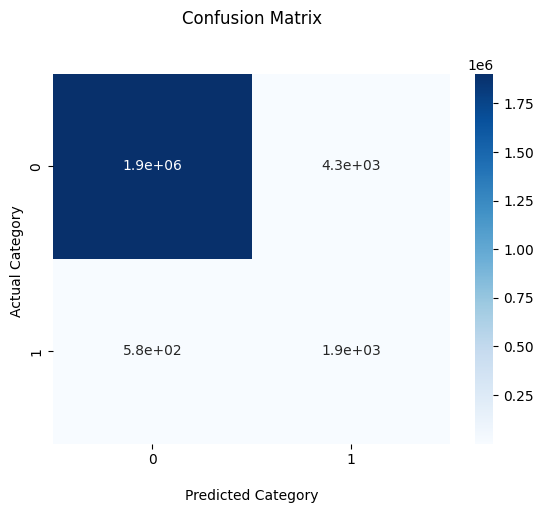

In [20]:
cm = confusion_matrix(y_test, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [21]:
predicted_labels = np.round(prediction_lgb)

# Check for incorrect predictions
incorrect_predictions = np.where(predicted_labels != y_test)[0]

# Display the rows in x_test where the model made incorrect predictions
incorrect_rows = x_test.iloc[incorrect_predictions]

print('Rows with incorrect predictions:')
print(incorrect_rows)

# for idx in incorrect_predictions:
#     print(f'Index: {idx}, Predicted: {predicted_labels[idx]}, Actual: {y_test[idx]}')

Rows with incorrect predictions:
         Type    Amount  ID_Source  Old_Balance  New_Balance  Source_State  \
1         4.0  0.000007       -1.0     0.000000     0.000000           7.0   
371       5.0  0.001107       -1.0     0.004001     0.001672           2.0   
396       2.0  0.044404       -1.0     0.093680     0.000000           4.0   
855       2.0  0.003734       -1.0     0.009519     0.001646           4.0   
1514      5.0  0.002221       -1.0     0.006357     0.001676           5.0   
...       ...       ...        ...          ...          ...           ...   
1906812   5.0  0.000050       -1.0     0.000045     0.000000           1.0   
1907045   2.0  0.005550       -1.0     0.012828     0.001123           6.0   
1907094   2.0  0.003841       -1.0     0.007842     0.000000           1.0   
1907518   2.0  0.001081       -1.0     0.002251     0.000000           1.0   
1908509   5.0  0.028264       -1.0     0.059630     0.000000           1.0   

         Source_City  Device_N

Undersampling the Fraud Cases to get equal ratio

In [22]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = test[test['Is_Fraud'] == 0]
df_minority = test[test['Is_Fraud'] == 1]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,              # without replacement
    n_samples=len(df_minority),# match minority class size
    random_state=42             # reproducibility
)

# Combine minority class with downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_test_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
df_test_balanced['Is_Fraud'].value_counts()

Is_Fraud
1    2488
0    2488
Name: count, dtype: int64

In [24]:
x_test_balanced = df_test_balanced.drop(['Is_Fraud'],axis = 1)
y_test_balanced = df_test_balanced['Is_Fraud']

In [25]:
x_test_balanced = preprocess_test(x_test_balanced,scaler, encoder)

In [26]:
prediction_lgb = model.predict(x_test_balanced)
print('Predicted labels: ', np.round(prediction_lgb)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [0 0 1 1 1 0 1 0 1 0]
Actual labels   :  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Is_Fraud, dtype: int64


In [27]:
print('Accuracy: ', accuracy_score(y_test_balanced, prediction_lgb))

Accuracy:  0.8816318327974276


In [28]:
print(classification_report(y_test_balanced, prediction_lgb))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2488
           1       1.00      0.77      0.87      2488

    accuracy                           0.88      4976
   macro avg       0.90      0.88      0.88      4976
weighted avg       0.90      0.88      0.88      4976



[[2483    5]
 [ 584 1904]]


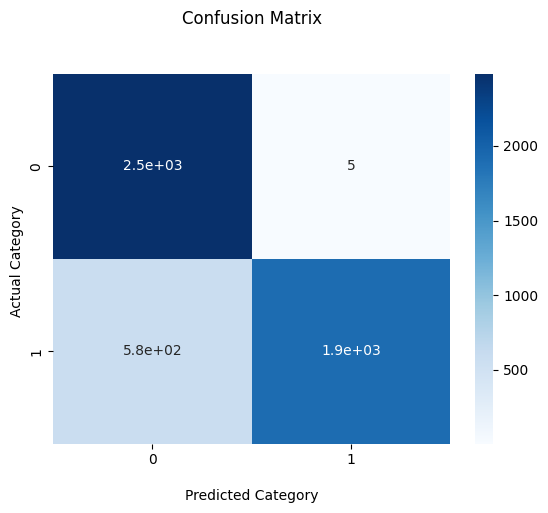

In [29]:
cm = confusion_matrix(y_test_balanced, prediction_lgb)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [1]:
x_test_balanced.columns

NameError: name 'x_test_balanced' is not defined

In [31]:
import joblib

joblib.dump(model, 'lgbm_classifier.pkl')

['lgbm_classifier.pkl']

In [32]:
joblib.dump(scaler, 'lgbm_scaler.pkl')

['lgbm_scaler.pkl']

In [33]:
joblib.dump(scaler, 'lgbm_scaler.pkl')
joblib.dump(encoder, 'lgbm_encoder.pkl')

['lgbm_encoder.pkl']